# MVP Análise de Dados e Boas Práticas

**Nome:** Arielen de Morais Viana

**Matrícula:** 4052023001299

**Dataset:** [Supermarket store branches sales analysis](https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data?resource=download)


# Definição do Problema

Este projeto tem como objetivo realizar uma análise exploratória e pré-processamento de dados relacionados às vendas em lojas de varejo. Atraves desse estudo, será possível compreender melhor os fatores que influenciam os resultados de vendas, como área da loja, número de itens disponiveis e fluxo diário de clientes.

Este projeto não envolve criação de modelo preditivo, e sim análise exploratória. Portanto, o problema é classificado como **não supervisionado**.

## Hipóteses do Problema

Algumas hipóteses iniciais consideradas são:

- Lojas com maior área física tendem a apresentar vendas maiores.
- A quantidade de clientes atendidos diariamente tem forte correlação com o volume de vendas.
- Lojas com maior variedade de itens disponíveis podem atender melhor às necessidades dos clientes e, consequentemente, vender mais.

Essas hipóteses serão investigadas com base na análise exploratória dos dados disponíveis.

## Tipo de Problema

Apesar de o dataset conter uma variável que poderia ser utilizada como alvo (`Store_Sales`), optei por não realizar uma modelagem supervisionada, pois o objetivo deste projeto está focado na análise exploratória e compreensão dos padrões presentes nos dados.

## Seleção de Dados

O conjunto de dados utilizado foi obtido em um repositório público (Kaggle) e contém informações agregadas sobre lojas de varejo. Os dados são fictícios, anonimizados e refletem métricas operacionais como vendas, fluxo de clientes, quantidade de itens e área da loja.

Critérios de seleção:
- Dataset público e gratuito
- Estrutura simples, com dados contínuos e categóricos
- Compatível com os objetivos do projeto de análise exploratória

## Atributos do Dataset

A base de dados é composta pelos seguintes atributos:

- `Store ID`: identificador único de cada loja
- `Store_Area`: área total da loja (em metros ou pés quadrados)
- `Items_Available`: número total de itens disponíveis para venda
- `Daily_Customer_Count`: média de clientes atendidos por dia
- `Store_Sales`: total de vendas da loja (valor monetário)

# Importação das Bibliotecas Necessárias e Carga de Dados

Nesta etapa, serão importadas as bibliotecas que serão utilizadas ao longo do projeto, como `pandas` para manipulação de dados, `matplotlib` e `seaborn` para criação de gráficos. Em seguida, será realizado o carregamento do conjunto de dados para análise.

In [108]:
# Importação das bibliotecas principais
import pandas as pd            # manipulação de dados
import matplotlib.pyplot as plt  # criação de gráficos
import seaborn as sns          # visualizações avançadas

In [109]:
# Configurações visuais para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')
%matplotlib inline

In [110]:
# Carregamento do dataset
# Substitua o nome abaixo se seu arquivo for diferente
df = pd.read_csv('/content/Stores.csv')

In [111]:
# Visualização das primeiras linhas
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


# Análise de Dados

Nesta etapa, será feita uma análise inicial dos dados com o objetivo de compreender sua estrutura, tipos de variáveis, existência de valores ausentes ou inconsistentes e o comportamento estatístico das principais colunas. A partir dessas informações, será possível levantar insights e hipóteses mais embasadas para as etapas seguintes do projeto.

## Total e Tipo das Instâncias

O dataset analisado possui **896 instâncias (observações)**, com informações agregadas sobre diferentes lojas de varejo. Os cinco atributos disponíveis são todos de **tipo numérico (inteiro ou decimal)**, o que permite a aplicação direta de métodos estatísticos e de visualização.

Não há atributos categóricos neste conjunto de dados. Além disso, nenhuma coluna apresenta valores ausentes, o que facilita o processo de análise e pré-processamento.

In [112]:
# Verificando o número de linhas e colunas
print("Dimensão do dataset:", df.shape)

# Verificando o nome das colunas e os tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Verificando se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Dimensão do dataset: (896, 5)

Tipos de dados:
Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

Valores ausentes por coluna:
Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


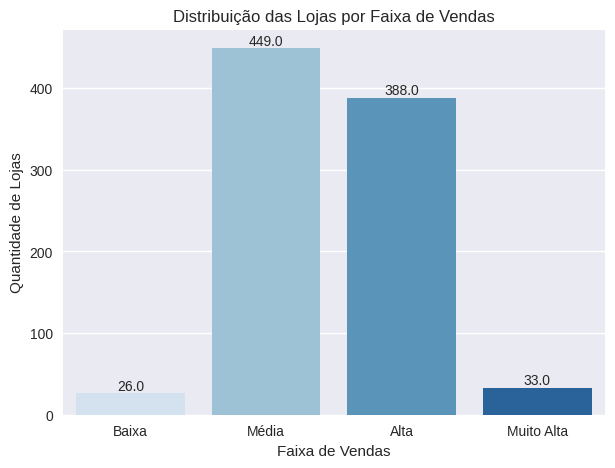

In [113]:
# Criando categorias de vendas
df['Faixa_de_Vendas'] = pd.cut(df['Store_Sales'],
                               bins=[0, 30000, 60000, 90000, 120000],
                               labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])

# Gráfico de barras com cores diferentes e rótulos de dados
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Faixa_de_Vendas', hue='Faixa_de_Vendas', data=df,
                   palette='Blues', legend=False)

plt.title('Distribuição das Lojas por Faixa de Vendas')
plt.xlabel('Faixa de Vendas')
plt.ylabel('Quantidade de Lojas')

# Adicionando os rótulos em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()

O gráfico de barras mostra a distribuição das lojas de acordo com a faixa de vendas. A maioria das lojas está concentrada nas faixas "Média" e "Alta", enquanto poucas apresentam vendas "Muito Altas" ou "Baixas", sugerindo uma tendência centralizada nas faixas intermediárias.

## Estatísticas Descritivas

Estatisticas descritivas fornecem um resumo das características numéricas do dataset. São úteis para entender a distribuição, tendência central e dispersão dos dados. As principais métricas incluem:

- **Média (mean)**: valor médio.
- **Desvio padrão (std)**: grau de dispersão em relação à média.
- **Mínimo e Máximo (min, max)**: valores extremos.
- **Quartis (25%, 50%, 75%)**: dividem a distribuição em partes iguais.

In [114]:
# estatísticas descritivas básicas do dataset
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


A partir da tabela, observamos que:

- A **área das lojas (Store_Area)** varia entre 775 e 2.229 m², com média de aproximadamente 1.485 m².
- O número de **itens disponíveis (Items_Available)** varia de 932 a 2.667, com média de 1.782.
- O fluxo diário de clientes (**Daily_Customer_Count**) varia entre 10 e 1.560 pessoas por dia, com média de 786.
- Já as **vendas totais (Store_Sales)** variam entre R\$ 14.920,00 e R\$ 116.320,00, com média de R$ 59.351,00.


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [115]:
# Média de cada atributo numérico
df.describe().loc['mean']

,mean
Store ID,448.500000
Store_Area,1485.409598
Items_Available,1782.035714
Daily_Customer_Count,786.350446
Store_Sales,59351.305804


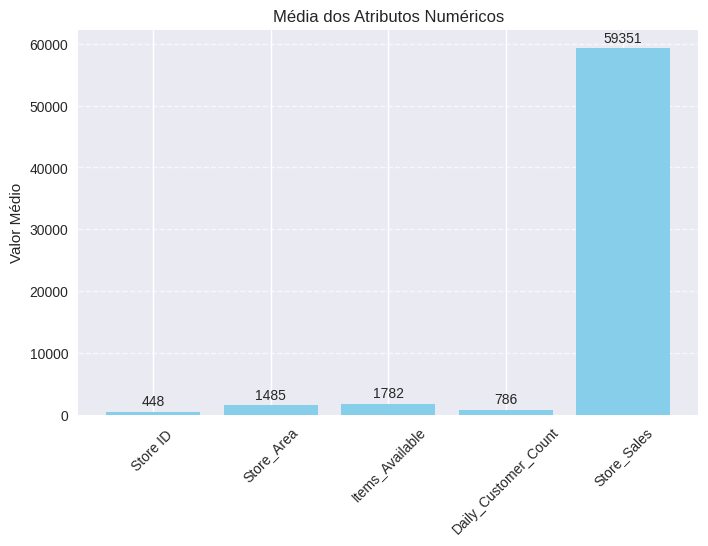

In [116]:
# Valores das médias
mean_values = df.describe().loc['mean']

# Gráfico de barras com os valores das médias
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_values.index, mean_values.values, color='skyblue')

plt.title('Média dos Atributos Numéricos')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos com os valores
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:.0f}', ha='center', va='bottom')

plt.show()

O gráfico de barras é ideal para representar medidas agregadas, como médias. Ele facilita a visualização e comparação entre as variáveis.

**Observação:**
A variável `Store_Sales` tem uma média bem maior do que as outras, o que pode acabar distorcendo a visualização dos dados. Caso fosse necessário analisar as demais com mais clareza, seria possível aplicar uma transformação ou normalização dos dados.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [117]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Store ID,258.797218
Store_Area,250.237011
Items_Available,299.872053
Daily_Customer_Count,265.389281
Store_Sales,17190.741895


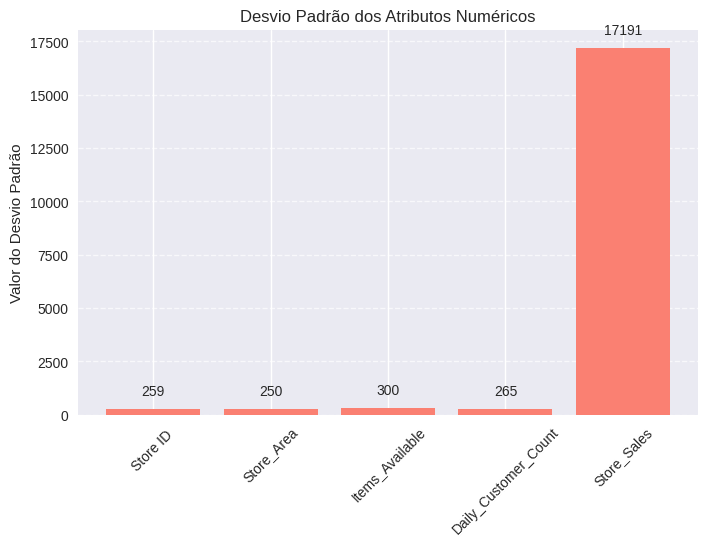

In [118]:
std_values = df.describe().loc['std']

# Gráfico de barras com rótulos de dados
plt.figure(figsize=(8, 5))
bars = plt.bar(std_values.index, std_values.values, color='salmon')

plt.title('Desvio Padrão dos Atributos Numéricos')
plt.ylabel('Valor do Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:.0f}', ha='center', va='bottom')

plt.show()

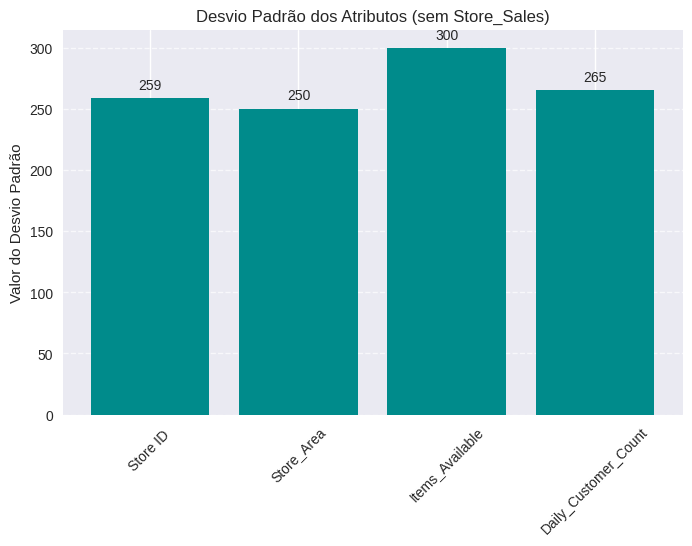

In [119]:
# Removendo Store_Sales da visualização para melhorar a comparação
std_values_excl = std_values.drop('Store_Sales')

plt.figure(figsize=(8, 5))
bars = plt.bar(std_values_excl.index, std_values_excl.values, color='darkcyan')

plt.title('Desvio Padrão dos Atributos (sem Store_Sales)')
plt.ylabel('Valor do Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.0f}', ha='center', va='bottom')

plt.show()

No primeiro gráfico, exibimos o desvio padrão de todos os atributos. Porém, a variável **`Store_Sales`** possui um valor muito mais alto do que as demais, o que acaba distorcendo o gráfico e dificultando a visualização dos outros atributos.

Por isso, também foi criado um **segundo gráfico**, excluindo a variável `Store_Sales`. Dessa forma, conseguimos observar melhor as diferenças de dispersão entre os outros atributos do dataset.

**Gráfico utilizado:**  
Utilizamos o **gráfico de barras**, pois ele é ideal para comparar a variação entre atributos numéricos.


## Histograma

Os histogramas com linha de densidade (KDE) mostram como os principais atributos numéricos do dataset estão distribuídos. A maioria deles apresenta uma distribuição simétrica, com formato semelhante ao de uma curva normal.

Esse tipo de visualização ajuda a entender o comportamento geral de cada variável e identificar padrões, como assimetrias, picos ou dispersões. Além disso, facilita a comparação entre atributos para descobrir quais têm comportamento mais concentrado ou mais disperso.

### *Distribuição dos Atributos Mais Relevantes*

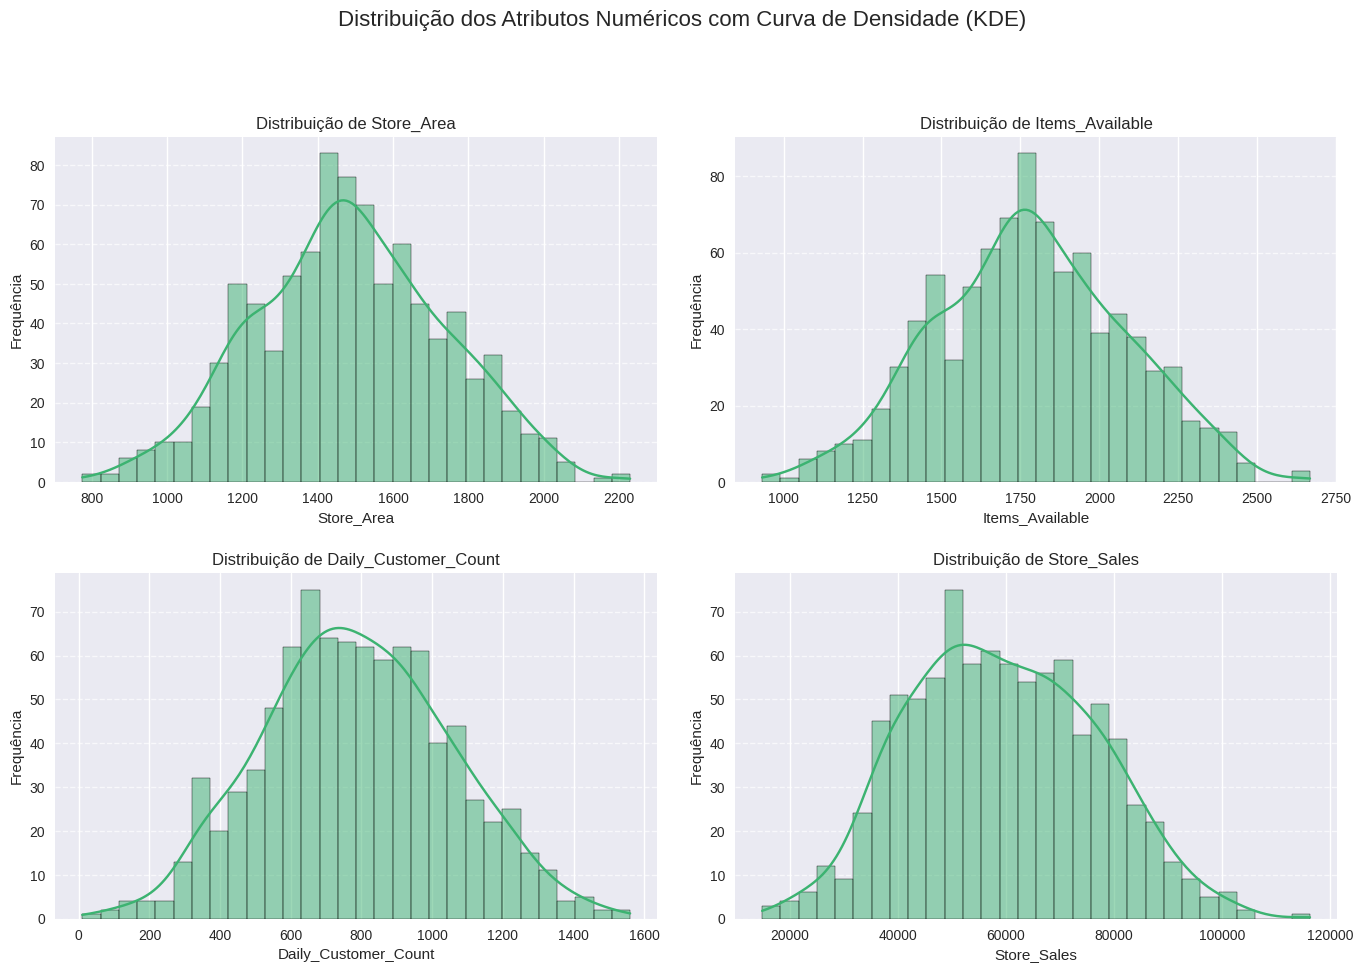

In [120]:
# **Histogramas com Curva de Densidade (KDE)**
# Gerando histogramas com linha de densidade para os atributos numéricos relevantes

import seaborn as sns
import matplotlib.pyplot as plt

# Lista de colunas numéricas (excluindo o Store_ID)
colunas_numericas = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

# Tamanho da figura
plt.figure(figsize=(14, 10))

# Loop para criar subplots
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=coluna, kde=True, bins=30, color='mediumseagreen', edgecolor='black')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Distribuição dos Atributos Numéricos com Curva de Densidade (KDE)', fontsize=16)
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])  # espaço para o título geral
plt.show()

Acima temos os histogramas com curvas de densidade (KDE) dos principais atributos numéricos do dataset, o que nos ajuda a entender melhor a distribuição dos dados:

- **Área da Loja (Store_Area)**: Apresenta uma distribuição relativamente simétrica e concentrada em torno da média (~1500 m²), com leve tendência à normalidade.
- **Itens Disponíveis (Items_Available)**: Segue uma distribuição próxima do formato normal, com um pico em torno de 1800 itens. Isso indica que a maioria das lojas oferece uma quantidade similar de produtos.
- **Clientes Diários (Daily_Customer_Count)**: A distribuição também é aproximadamente simétrica, com a maioria das lojas recebendo entre 600 e 900 clientes por dia.
- **Vendas por Loja (Store_Sales)**: Apesar de ter uma curva relativamente suave, nota-se uma leve assimetria à direita (distribuição um pouco enviesada), o que indica a presença de algumas lojas com vendas consideravelmente mais altas.

## Boxplot

Para entender como os atributos numéricos se comportam em diferentes contextos de vendas, vamos agrupá-los por Faixa de Vendas. Isso nos permite visualizar como variáveis como área da loja, número de clientes diários, itens disponíveis e vendas totais se distribuem em lojas com baixa, média, alta e muito alta performance.

Essa abordagem ajuda a identificar padrões ou diferenças relevantes entre as faixas — por exemplo, se lojas com vendas muito altas tendem a ter mais itens disponíveis, ou se o número de clientes diários influencia diretamente no desempenho.

In [121]:
# Estatísticas descritivas por faixa de vendas (sem FutureWarning)
df.groupby('Faixa_de_Vendas', observed=True).describe()

Store ID                                                \
                    count        mean         std   min     25%    50%   
Faixa_de_Vendas                                                          
Baixa                26.0  408.153846  251.574672  27.0  255.00  366.0   
Média               449.0  448.349666  256.608800   2.0  233.00  456.0   
Alta                388.0  444.283505  261.580571   1.0  214.75  443.5   
Muito Alta           33.0  531.909091  256.312842  85.0  370.00  558.0   

                               Store_Area               ...  \
                    75%    max      count         mean  ...   
Faixa_de_Vendas                                         ...   
Baixa            596.25  866.0       26.0  1374.653846  ...   
Média            668.00  896.0      449.0  1469.405345  ...   
Alta             669.25  894.0      388.0  1510.920103  ...   
Muito Alta       733.00  895.0       33.0  1490.484848  ...   

                Daily_Customer_Count         Store_Sales                \
                                 75%     max       count          mean   
Faixa_de_Vendas                                                          
Baixa                          987.5  1340.0        26.0  23943.076923   
Média                          960.0  1530.0       449.0  47262.739421   
Alta                           980.0  1560.0       388.0  72570.103093   
Muito Alta                     950.0  1310.0        33.0  96305.454545   

                                                                            
                         std      min      25%      50%      75%       max  
Faixa_de_Vendas                                                             
Baixa            3819.976722  14920.0  21675.0  25005.0  27175.0   29170.0  
Média            7833.470161  30020.0  41080.0  48140.0  53890.0   59980.0  
Alta             7973.170936  60060.0  65915.0  71550.0  78440.0   89760.0  
Muito Alta       5477.272982  90070.0  92370.0  94460.0  99480.0  116320.0  

[4 rows x 40 columns]

### *Área da loja* por Faixa de Venda

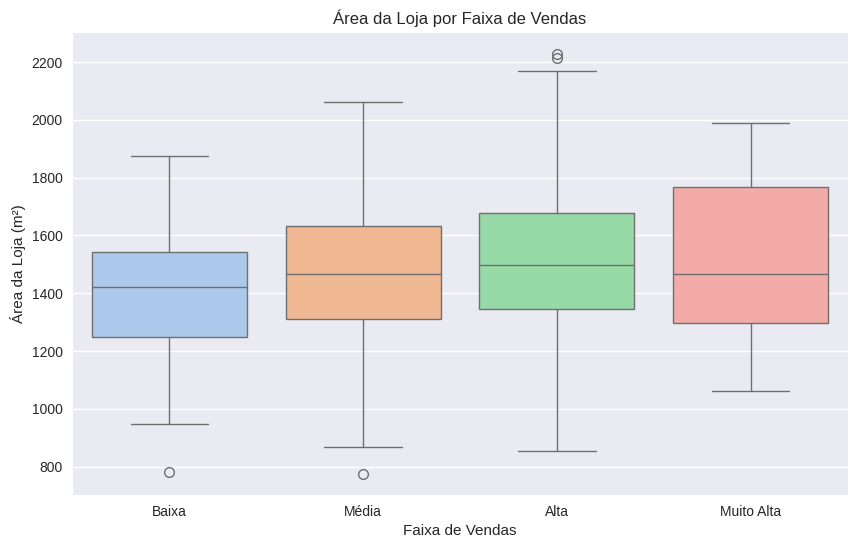

In [122]:
# Boxplot da área das lojas em cada faixa de vendas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Faixa_de_Vendas', y='Store_Area', data=df,
            hue='Faixa_de_Vendas', palette='pastel', legend=False)
plt.title('Área da Loja por Faixa de Vendas')
plt.xlabel('Faixa de Vendas')
plt.ylabel('Área da Loja (m²)')
plt.show()


Este boxplot mostra a distribuição da **área das lojas (em m²)** para cada **faixa de vendas** (Baixa, Média, Alta e Muito Alta).

**Principais insights:**
- A mediana da área das lojas **aumenta conforme a faixa de vendas sobe**, indicando que lojas maiores tendem a vender mais.
- Apesar disso, há **variação dentro de cada grupo**: algumas lojas menores aparecem em faixas de vendas mais altas, o que sugere que **o tamanho não é o único fator determinante das vendas**.
- Na faixa “Muito Alta”, por exemplo, existem **lojas pequenas com vendas elevadas**, que se destacam como outliers.

Esse gráfico nos ajuda a entender **como a área da loja pode influenciar (ou não)** o desempenho em vendas, além de revelar possíveis exceções que merecem atenção estratégica.

### *Clientes Diários* por Faixa de Venda

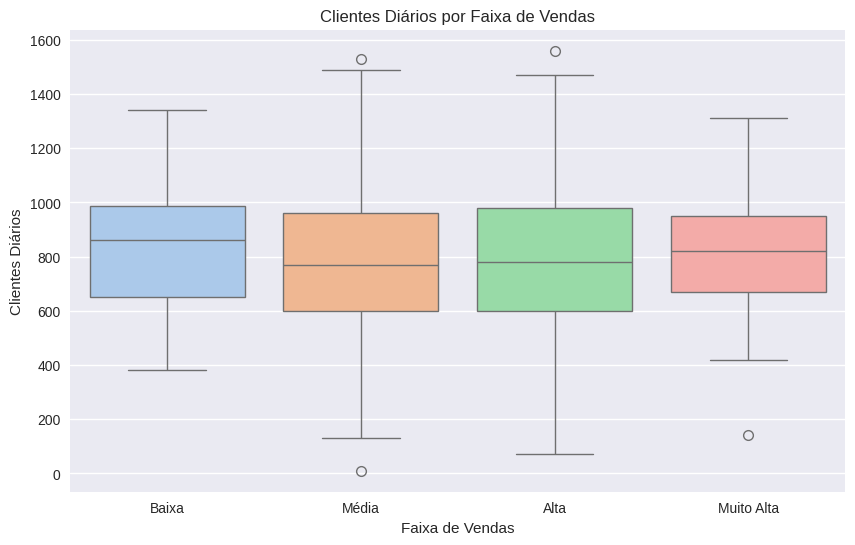

In [123]:
# Boxplot do número de clientes diários em cada faixa de vendas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Faixa_de_Vendas', y='Daily_Customer_Count', data=df,
            hue='Faixa_de_Vendas', palette='pastel', legend=False)
plt.title('Clientes Diários por Faixa de Vendas')
plt.xlabel('Faixa de Vendas')
plt.ylabel('Clientes Diários')
plt.show()

O gráfico mostra que lojas com faixas de vendas mais altas tendem a ter uma maior mediana de clientes diários. No entanto, as distribuições se sobrepõem bastante, indicando que o volume de clientes, embora importante, não é o único fator que define a faixa de vendas. Algumas lojas com menos clientes ainda conseguem alto desempenho, possivelmente por ticket médio mais elevado.

### *Itens Disponiveis* por Faixa de Venda

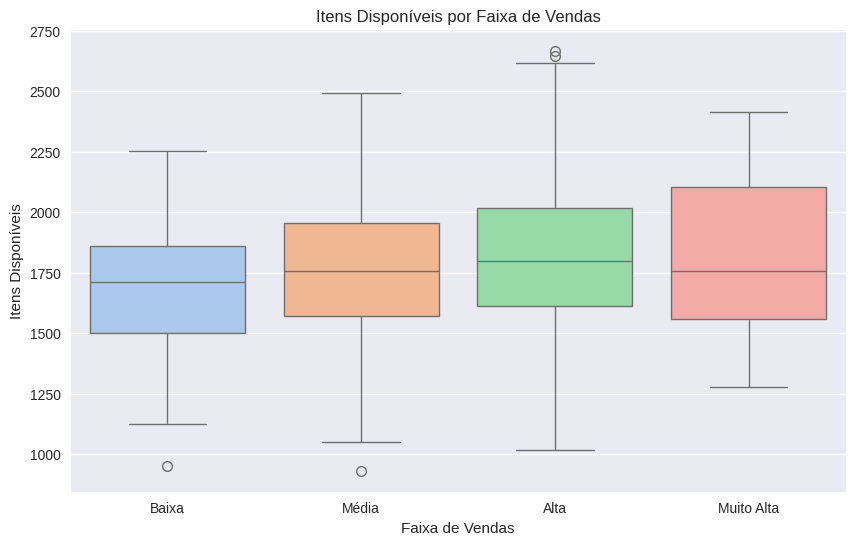

In [124]:
# Boxplot da quantidade de itens disponíveis em cada faixa de vendas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Faixa_de_Vendas', y='Items_Available', data=df,
            hue='Faixa_de_Vendas', palette='pastel', legend=False)
plt.title('Itens Disponíveis por Faixa de Vendas')
plt.xlabel('Faixa de Vendas')
plt.ylabel('Itens Disponíveis')
plt.show()

A distribuição do número de itens disponíveis por faixa de vendas mostra que lojas com maior faturamento tendem a oferecer mais itens. A mediana dos grupos mais altos de venda é ligeiramente maior, o que pode indicar que a variedade de produtos influencia no desempenho de vendas. No entanto, também há sobreposição entre as faixas, o que sugere que apenas ter mais itens disponíveis não garante um melhor desempenho.

### *Distribuição de Lojas* por Faixa de Venda

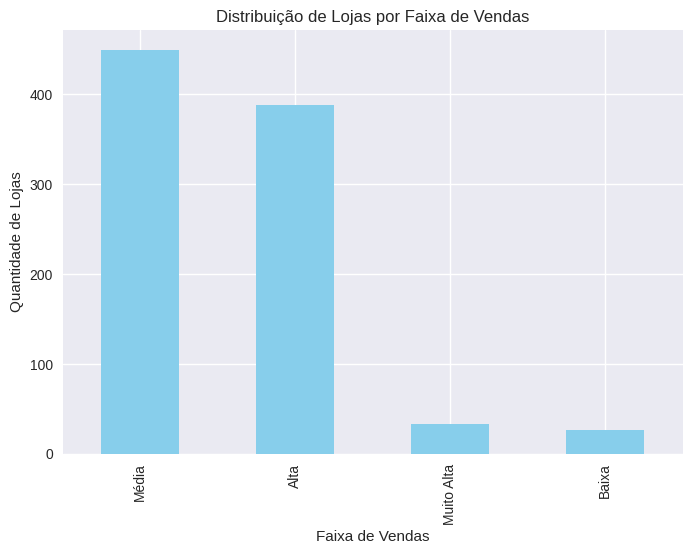

In [125]:
# Gráfico de barras para visualizar a quantidade de lojas em cada faixa de vendas
df['Faixa_de_Vendas'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Lojas por Faixa de Vendas')
plt.xlabel('Faixa de Vendas')
plt.ylabel('Quantidade de Lojas')
plt.show()

**Principais insights:**
- A maior parte das lojas está concentrada nas faixas Média e Alta, indicando que esses são os desempenhos mais comuns no dataset.
- As faixas Muito Alta e Baixa possuem significativamente menos lojas, o que pode sugerir oportunidade de expansão ou ações específicas para esses extremos.

## Análise de Outliers
Os outliers são valores extremos que fogem da tendência central dos dados e podem representar situações atípicas, erros de medição ou oportunidades estratégicas. Para identificá-los, utilizamos gráficos de boxplot para cada variável numérica.

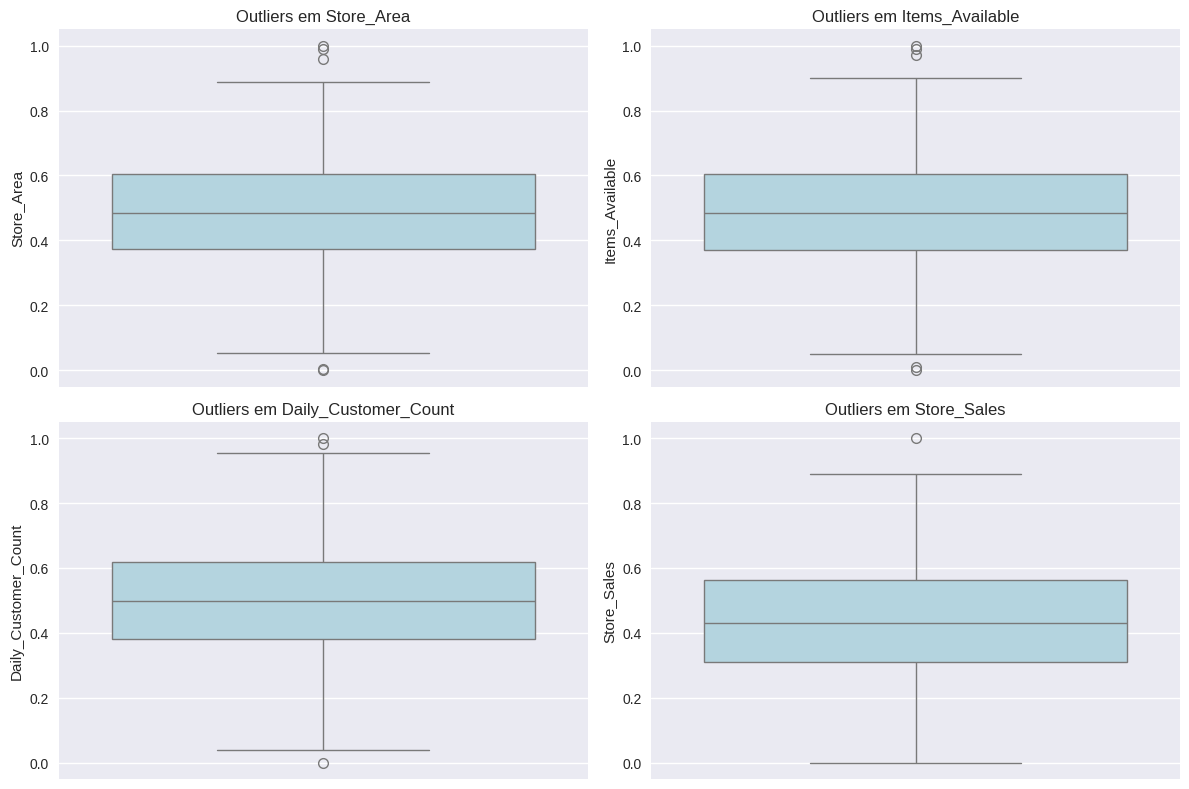

In [159]:
# Criando boxplots para detectar possíveis outliers nas variáveis numéricas
plt.figure(figsize=(12, 8))

# Loop para plotar cada variável
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Outliers em {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Pelo gráfico, dá pra perceber que algumas lojas têm um faturamento bem acima da média, o que chama atenção. O número de clientes por dia também tem alguns pontos fora do comum, indicando lojas com um fluxo muito maior que o esperado. Essas exceções podem representar oportunidades interessantes, como estar em uma localização boa ou ter alguma promoção, e por isso valem uma análise mais detalhada.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [126]:
# Matriz de correlação entre as variáveis numéricas do dataset
print("\nMatriz de Correlação:")
print(df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr())


Matriz de Correlação:
                      Store_Area  Items_Available  Daily_Customer_Count  \
Store_Area              1.000000         0.998891             -0.041423   
Items_Available         0.998891         1.000000             -0.040978   
Daily_Customer_Count   -0.041423        -0.040978              1.000000   
Store_Sales             0.097474         0.098849              0.008629   

                      Store_Sales  
Store_Area               0.097474  
Items_Available          0.098849  
Daily_Customer_Count     0.008629  
Store_Sales              1.000000  


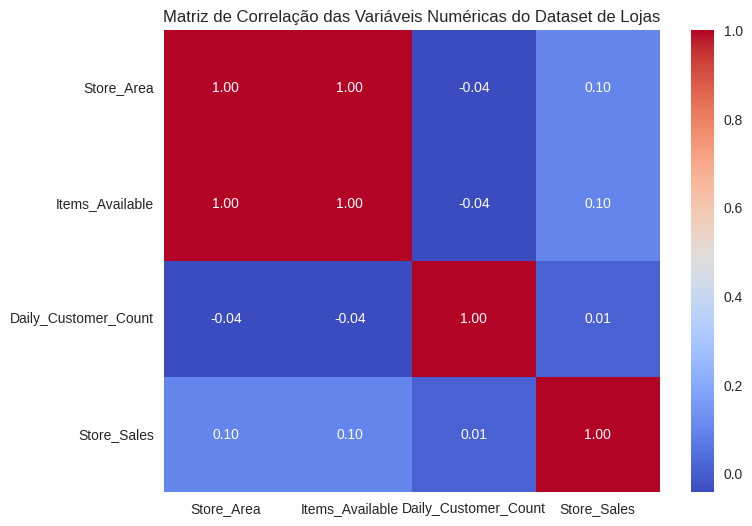

In [127]:
# Mapa de calor das correlações numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas do Dataset de Lojas')
plt.show()

A matriz de correlação mostra que as vendas estão bem relacionadas ao tamanho da loja e à quantidade de produtos disponíveis. Ou seja, quanto maior a loja e maior a variedade, maior tende a ser o faturamento. Já o número de clientes por dia quase não tem relação com as vendas, o que sugere que, neste caso, atrair mais gente não significa necessariamente vender mais.

## Tratamento de Valores Nulos

O tratamento de valores nulos é uma etapa fundamental na análise de dados, pois valores ausentes podem comprometer a qualidade das análises. No caso do dataset de lojas, verificamos se há valores nulos nas colunas numéricas e categóricas principais.

In [128]:
# Verificar a presença de valores nulos no dataset de lojas
print("Valores nulos no dataset de lojas:")
df.isnull().sum()

Valores nulos no dataset de lojas:


,0
Store ID,0
Store_Area,0
Items_Available,0
Daily_Customer_Count,0
Store_Sales,0
Faixa_de_Vendas,0


Não foram encontrados valores nulos no dataset de lojas, o que dispensa a necessidade de imputações ou remoção de dados nesta etapa.

In [129]:
# Gráfico opcional para visualização de valores nulos
# plt.figure(figsize=(8, 4))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Visualização de Valores Nulos no Dataset')
# plt.show()

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [130]:
# Separar preditores (X) e variável alvo (y)
X = df.drop('Faixa_de_Vendas', axis=1)
y = df['Faixa_de_Vendas']

In [131]:
# Dividir em conjuntos de treino e teste (70% treino, 30% teste)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [132]:
# Verificar as dimensões
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (627, 5)
Dimensões de X_test: (269, 5)
Dimensões de y_train: (627,)
Dimensões de y_test: (269,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [133]:
# Normalização dos dados numéricos com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [134]:
# Seleciona as colunas numéricas
numeric_cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

In [135]:
# Instancia o normalizador
scaler_norm = MinMaxScaler()

In [136]:
# Aplica o MinMaxScaler nas colunas numéricas
df[numeric_cols] = scaler_norm.fit_transform(df[numeric_cols])

In [137]:
# Visualiza as 5 primeiras linhas já normalizadas
print("\nPrimeiras 5 linhas após normalização:")
print(df.head())


Primeiras 5 linhas após normalização:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1    0.607978         0.593084              0.335484     0.508580   
1          2    0.471802         0.472622              0.129032     0.245562   
2          3    0.388583         0.390202              0.458065     0.385503   
3          4    0.464924         0.470317              0.393548     0.382742   
4          5    0.684319         0.679539              0.283871     0.312623   

  Faixa_de_Vendas  
0            Alta  
1           Média  
2           Média  
3           Média  
4           Média  


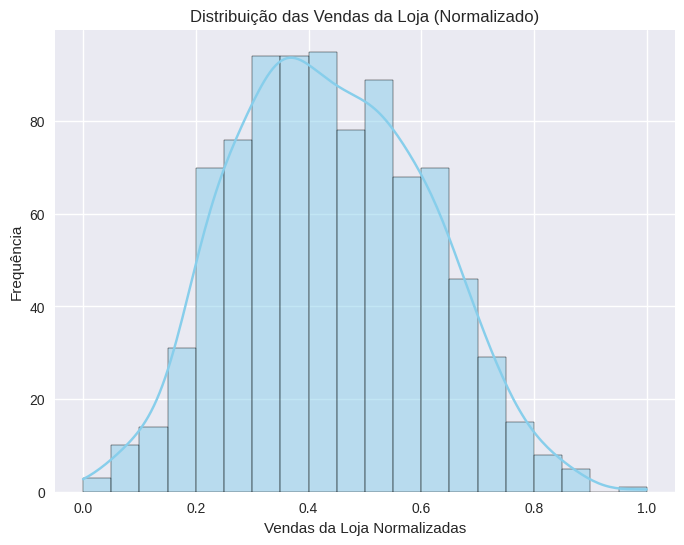

In [138]:
# Visualização da distribuição da variável normalizada
plt.figure(figsize=(8, 6))
sns.histplot(df['Store_Sales'], kde=True, color='skyblue')
plt.title('Distribuição das Vendas da Loja (Normalizado)')
plt.xlabel('Vendas da Loja Normalizadas')
plt.ylabel('Frequência')
plt.show()

O histograma acima mostra como ficaram os valores de *Store_Sales* depois da normalização com o MinMaxScaler. Agora, todos os números estão entre 0 e 1, mas a forma da distribuição continua a mesma, ou seja, a relação entre os dados foi mantida.
Essa etapa é super importante, principalmente quando vamos usar algoritmos de machine learning que são sensíveis à escala. Normalizar os dados ajuda a evitar que variáveis com números maiores acabem tendo mais peso do que deveriam e melhora a performance dos modelos.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [139]:
# Importando o StandardScaler para padronização
from sklearn.preprocessing import StandardScaler

In [140]:
# Definindo as variáveis numéricas do seu dataset
colunas_numericas = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

In [141]:
# Separando os dados em X (features numéricas)
X = df[colunas_numericas]

In [142]:
# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [143]:
# Instanciando o scaler e ajustando apenas com os dados de treino
scaler_std = StandardScaler()
X_train_standardized = scaler_std.fit_transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

In [144]:
# Transformando em DataFrame para visualização
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [145]:
# Visualizando as 5 primeiras linhas
print("Primeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())

Primeiras 5 linhas dos dados padronizados (treino):
   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0    1.303742         1.223869              0.602209    -1.331795
1   -1.903403        -1.909859             -0.427776    -0.694225
2    1.243758         1.197142             -0.427776     0.481166
3    1.131787         1.177097             -1.686646    -0.040323
4   -1.043632        -1.021190             -0.580366    -0.571145


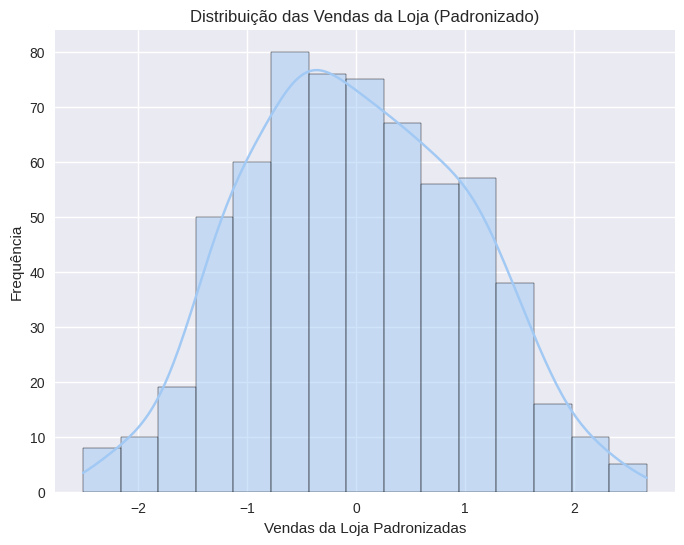

In [146]:
# Visualização da distribuição após a padronização (usando Store_Sales)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Store_Sales'], kde=True)
plt.title('Distribuição das Vendas da Loja (Padronizado)')
plt.xlabel('Vendas da Loja Padronizadas')
plt.ylabel('Frequência')
plt.show()

O histograma de *Store_Sales* após a padronização mostra que os valores foram transformados para uma distribuição centrada, com média próxima de 0 e desvio padrão igual a 1.
Esse processo é útil principalmente para algoritmos que assumem que os dados estão em uma escala padronizada, como modelos lineares e redes neurais.
Além disso, a padronização facilita a comparação entre variáveis com diferentes unidades de medida.

## Feature Engineering

Agora que já exploramos e tratamos nossos dados, vamos dar um passo além e criar novas variáveis que podem nos ajudar a entender melhor o desempenho das lojas. Vamos combinar colunas existentes para gerar informações mais ricas e úteis para análise.

As novas colunas que criei foram:

- Vendas por metro quadrado (Vendas_por_m2): mostra o quanto cada loja fatura em média por metro quadrado, ou seja, sua eficiência em vendas.

- Clientes por metro quadrado (Clientes_por_m2): indica o fluxo de clientes por área, o que pode sugerir o quão movimentada é a loja.

- Itens por cliente (Itens_por_Cliente): calcula a média de itens disponíveis por cliente, o que pode apontar para variedade percebida ou abastecimento.

- Ticket médio (Ticket_Medio): mostra quanto, em média, cada cliente gasta por dia na loja.

Essas novas variáveis vão nos ajudar a fazer análises mais completas e a tirar conclusões mais relevantes sobre o desempenho de cada loja.

In [147]:
# Criando novas colunas com base em combinações das variáveis existentes
df['Vendas_por_m2'] = df['Store_Sales'] / df['Store_Area']
df['Clientes_por_m2'] = df['Daily_Customer_Count'] / df['Store_Area']
df['Itens_por_Cliente'] = df['Items_Available'] / df['Daily_Customer_Count']
df['Ticket_Medio'] = df['Store_Sales'] / df['Daily_Customer_Count']

# Visualizando as primeiras linhas do dataset com as novas variáveis
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Faixa_de_Vendas,Vendas_por_m2,Clientes_por_m2,Itens_por_Cliente,Ticket_Medio
0,1,0.607978,0.593084,0.335484,0.508580,Alta,0.836510,0.551803,1.767845,1.515959
1,2,0.471802,0.472622,0.129032,0.245562,Média,0.520477,0.273488,3.662824,1.903107
2,3,0.388583,0.390202,0.458065,0.385503,Média,0.992073,1.178807,0.851849,0.841591
3,4,0.464924,0.470317,0.393548,0.382742,Média,0.823234,0.846478,1.195068,0.972540
4,5,0.684319,0.679539,0.283871,0.312623,Média,0.456838,0.414822,2.393830,1.101287


Vamos observar como as lojas se distribuem em relação às novas variáveis que criamos. Isso pode nos ajudar a entender padrões interessantes, como lojas com alta eficiência de vendas, ticket médio maior, ou menor densidade de clientes.

In [150]:
# Importando biblioteca necessária
import matplotlib.pyplot as plt

In [151]:
# Selecionando as colunas novas para análise
novas_colunas = ['Vendas_por_m2', 'Clientes_por_m2', 'Itens_por_Cliente', 'Ticket_Medio']

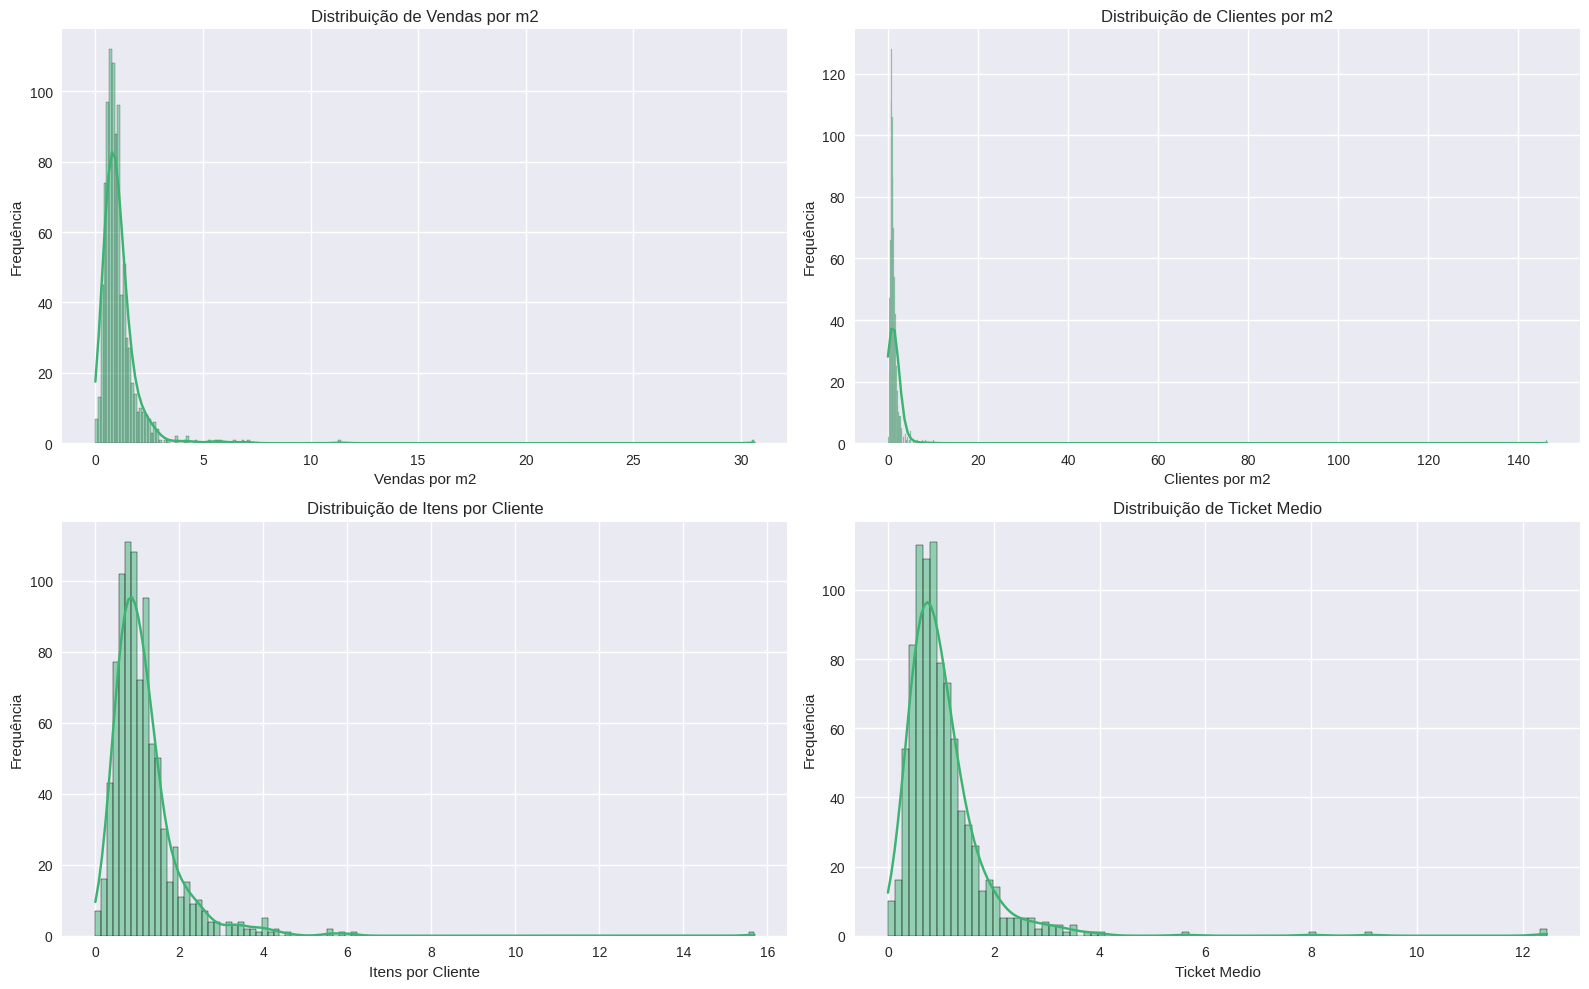

In [152]:
# Criando histogramas com KDE para visualizar a distribuição dessas variáveis
plt.figure(figsize=(16, 10))

for i, coluna in enumerate(novas_colunas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[coluna], kde=True, color='mediumseagreen')
    plt.title(f'Distribuição de {coluna.replace("_", " ")}')
    plt.xlabel(coluna.replace("_", " "))
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

As distribuições das novas variáveis criadas mostram que a maioria das lojas concentra seus resultados em faixas mais baixas, enquanto poucas lojas se destacam com valores significativamente maiores. Isso pode indicar:
- Desigualdade de performance entre as lojas;
- Oportunidade de replicar estratégias das lojas com melhor desempenho;
- Necessidade de investigar outliers (pontos muito fora da curva).

## Segmentação de Lojas com K-Means: Identificação de Perfis de Desempenho

In [153]:
# Importando biblioteca necessária
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Selecionar colunas numéricas para clustering
colunas_cluster = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']
X = df[colunas_cluster]

In [155]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [156]:
# Aplicar o KMeans com 3 clusters (pode testar outros depois)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

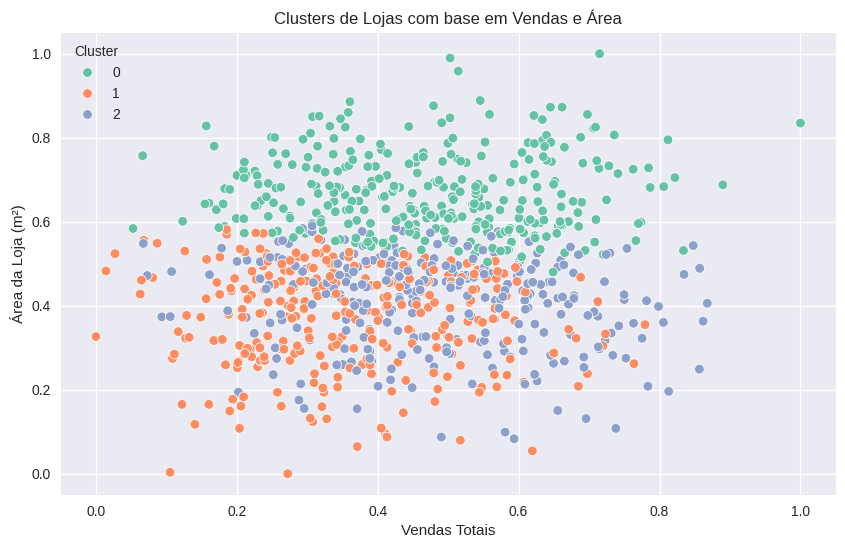

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Cluster_KMeans,,,,
0,0.67,0.67,0.48,0.47
1,0.37,0.37,0.38,0.36
2,0.41,0.41,0.64,0.48


In [157]:
# Visualizar a distribuição dos clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Store_Sales', y='Store_Area', hue='Cluster_KMeans', palette='Set2')
plt.title('Clusters de Lojas com base em Vendas e Área')
plt.xlabel('Vendas Totais')
plt.ylabel('Área da Loja (m²)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Ver o perfil médio de cada cluster
df.groupby('Cluster_KMeans')[colunas_cluster].mean().round(2)

**O que a segmentação das lojas nos mostrou?**

Através da técnica de K-Means, conseguimos agrupar as lojas com base em características como área da loja, quantidade de itens disponíveis, número de clientes por dia e vendas totais. O objetivo era entender se existiam padrões entre elas — e sim, encontramos três perfis bem diferentes!

**Cluster 0 - Azul – Lojas grandes e com bom desempenho**

Essas lojas têm a maior média de área e estoque, além de boas vendas. Elas também recebem um número razoável de clientes por dia. Representam aquelas unidades mais estruturadas, provavelmente com espaço de sobra e movimentação constante. Porém, elas não são as mais eficientes em termos de resultado por metro quadrado.

---

**Cluster 1 - Vermelho – Lojas menores, com desempenho mais fraco**

Esse grupo reúne as lojas com menor média de vendas, área e movimento. Elas podem estar localizadas em regiões com menos fluxo de pessoas ou talvez ainda não tenham atingido todo seu potencial. É um grupo que merece atenção, pois aqui pode haver oportunidade de melhoria ou de revisão de estratégia.

---

**Cluster 2 – Verde - Lojas médias com alta eficiência**

Esse grupo foi o mais interessante, porque mesmo sem ser o maior em estrutura ou estoque, são as lojas que mais vendem e mais atendem clientes por dia. Isso indica um nível de eficiência alto e elas aproveitam bem o espaço, têm boa rotatividade e estão em locais estratégicos. Vale a pena investigar o que essas lojas estão fazendo certo e tentar aplicar em outras unidades.

# Extra: Segmentação de Lojas com KMeans
Para ir além da análise exploratória básica, realizamos uma clusterização das lojas com o algoritmo KMeans, com o objetivo de identificar grupos com perfis similares de operação e desempenho. Reduzimos as variáveis numéricas para duas dimensões com PCA (Análise de Componentes Principais) para facilitar a visualização.

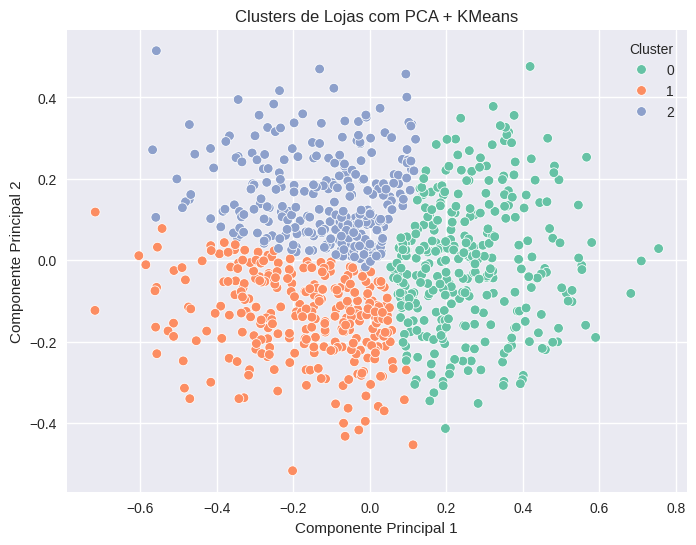

In [160]:
# Importando bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Aplicando PCA para reduzir as dimensões para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[numeric_cols])

# Aplicando o algoritmo KMeans com 3 clusters (pode testar outros valores também)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adicionando a coluna de cluster ao dataframe
df['Cluster'] = clusters

# Visualizando os clusters gerados
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Clusters de Lojas com PCA + KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

A análise de clusters revelou **três grupos distintos de lojas**, com base nas variáveis normalizadas. Essa segmentação pode ser útil para:

- Identificar lojas com perfil de **alto desempenho (Cluster 2 - verde)**, que tendem a estar posicionadas à direita do gráfico, com valores mais elevados nas componentes principais, sugerindo maior área, fluxo ou vendas.
- Entender o **perfil mais modesto (Cluster 1 - laranja)**, localizado à esquerda e mais denso, possivelmente composto por lojas menores ou com menor faturamento.
- O **Cluster 0 (azul)** mostra maior dispersão vertical, podendo indicar lojas com variações de performance mais ligadas a uma ou outra variável, como fluxo de clientes ou variedade de itens.

Esses grupos podem servir como base para estratégias específicas por perfil de loja: desde ações promocionais, ajustes de sortimento ou mudanças operacionais. O uso de PCA permitiu reduzir a dimensionalidade e visualizar claramente os agrupamentos formados.

# Conclusão

A análise do dataset de lojas permitiu identificar padrões relevantes de desempenho com base em variáveis como área da loja, quantidade de itens disponíveis, fluxo diário de clientes e vendas totais. A aplicação de técnicas de visualização e análise estatística possibilitou entender a distribuição e a relação entre essas variáveis.

Com a criação de novas métricas, como ticket médio e itens por cliente, foi possível enriquecer a análise e avaliar a eficiência operacional das lojas de forma mais completa.

A aplicação do algoritmo K-Means para segmentação revelou três grupos distintos de lojas:  
- Lojas com grande estrutura e desempenho mediano,  
- Lojas com menor estrutura e menor desempenho,  
- Lojas com estrutura média e alta eficiência em vendas e atendimento.

Esses resultados evidenciam que o desempenho de uma loja não depende apenas de sua estrutura física, mas de como ela é gerida e aproveitada. A análise, mesmo sem o uso de modelos preditivos, foi capaz de gerar insights práticos que podem orientar estratégias de melhoria e tomada de decisão.